# Preprocessing Datasets for Linear Regression

In [2]:
import warnings
warnings.filterwarnings('ignore')



In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
house_data = pd.read_csv('../ML_Percipio/kc_house_data.csv', sep=',')

In [5]:
house_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
len(house_data)

21613

In [7]:
house_data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


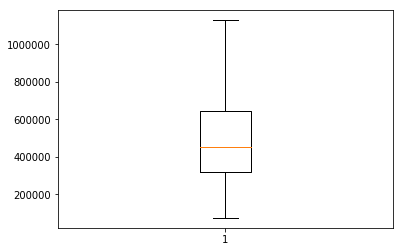

In [8]:
plt.boxplot(house_data['price'],0,'')
plt.show()

In [9]:
house_data = house_data.drop(['id','date','lat','long'], axis = 1)

In [10]:
house_data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,1800,7503


In [11]:
house_data = house_data.sample(frac=1).reset_index(drop=True)

In [12]:
house_data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
0,342000.0,3,2.50,1740,2226,2.0,0,0,3,8,1320,420,2008,0,98106,1740,1789
1,1555000.0,3,3.50,4360,6240,2.0,0,3,3,10,2960,1400,2008,0,98103,1920,3910
2,129000.0,2,1.00,1150,30184,1.0,0,0,3,6,1150,0,1950,0,98055,1670,19684
3,355000.0,4,2.75,2050,4000,2.0,0,0,3,8,2050,0,2014,0,98001,2050,4000
4,1220000.0,4,3.75,3520,3944,1.5,0,0,5,8,2200,1320,1913,0,98109,2310,4725


In [13]:
house_data['grade'].unique()

array([ 8, 10,  6,  7,  9, 11, 12,  5, 13,  4,  3,  1], dtype=int64)

In [14]:
house_data['yr_built'].unique()

array([2008, 1950, 2014, 1913, 1978, 1984, 1999, 2001, 1963, 1977, 2006,
       1993, 1985, 1961, 2002, 1962, 1941, 1956, 2004, 1992, 1920, 2009,
       1997, 1953, 1960, 1975, 1928, 2015, 1957, 1912, 1946, 1987, 1988,
       1996, 1972, 2011, 1954, 1998, 1942, 1951, 1990, 1976, 1981, 1971,
       2005, 1900, 1923, 1907, 1959, 1910, 1905, 1943, 2007, 1966, 1916,
       1911, 1939, 2003, 1965, 1932, 1944, 1924, 1925, 1979, 1930, 1902,
       1937, 1994, 1955, 2012, 1940, 1958, 1948, 1995, 2000, 1991, 1945,
       2010, 1917, 2013, 1980, 1969, 1914, 1974, 1964, 1936, 1986, 1918,
       1908, 1983, 1967, 1919, 1947, 1982, 1968, 1989, 1906, 1949, 1973,
       1952, 1935, 1970, 1933, 1927, 1926, 1929, 1934, 1922, 1909, 1904,
       1901, 1931, 1903, 1915, 1938, 1921], dtype=int64)

In [15]:
house_data[house_data.isnull().any(axis=1)]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15


In [16]:
from sklearn.model_selection import train_test_split
X = house_data.drop('price', axis = 1)
y = house_data['price']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state =0)

In [17]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()

In [18]:
linear_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [19]:
linear_model.score(X_train, y_train)

0.6478956855265725

In [20]:
linear_model.coef_

array([-3.83328708e+04,  4.87175921e+04,  1.05306264e+02, -1.85523723e-02,
        2.68273314e+04,  4.98101319e+05,  4.45600707e+04,  1.76961600e+04,
        1.20067258e+05,  5.02454880e+01,  5.50607760e+01, -3.60214130e+03,
        1.10614505e+01, -4.51868520e-01,  2.60581076e+01, -5.21939319e-01])

In [21]:
coefficients = pd.Series(linear_model.coef_, X_train.columns).sort_values()
print(coefficients)

bedrooms         -38332.870798
yr_built          -3602.141304
sqft_lot15           -0.521939
zipcode              -0.451869
sqft_lot             -0.018552
yr_renovated         11.061451
sqft_living15        26.058108
sqft_above           50.245488
sqft_basement        55.060776
sqft_living         105.306264
condition         17696.159980
floors            26827.331442
view              44560.070664
bathrooms         48717.592087
grade            120067.257739
waterfront       498101.319348
dtype: float64


In [22]:
y_predict = linear_model.predict(X_test)

In [23]:
y_predict

array([387511.89497637, 708364.66818864, 699397.77934694, ...,
       562965.56995363, 292928.63728676, 461393.08551441])

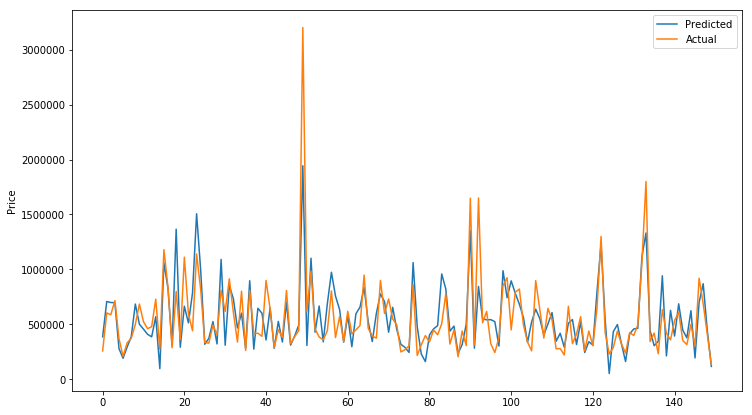

In [24]:
plt.figure(figsize=(12,7))
plt.plot(y_predict[:150,], label ='Predicted')
plt.plot(y_test[:150,].values , label = 'Actual')
plt.ylabel('Price')
plt.legend()
plt.show()

In [25]:
r_square = linear_model.score(X_test, y_test)
r_square

0.6718705655144296

In [26]:
from sklearn.metrics import mean_squared_error
msem = mean_squared_error(y_predict, y_test)
msem

49341983436.892204

In [27]:
import math
math.sqrt(msem)

222130.55493761366

# Scaling and Encoding to increase the accuracy

In [28]:
from sklearn.preprocessing import MinMaxScaler

In [29]:
house_data.head(2)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
0,342000.0,3,2.5,1740,2226,2.0,0,0,3,8,1320,420,2008,0,98106,1740,1789
1,1555000.0,3,3.5,4360,6240,2.0,0,3,3,10,2960,1400,2008,0,98103,1920,3910


In [30]:
x_continouse = house_data[['bathrooms','sqft_living','sqft_lot','floors','sqft_above','sqft_basement','yr_built','yr_renovated','sqft_living15','sqft_lot15','bedrooms','condition','grade']]

In [31]:
x_categorial = house_data[['waterfront','view']]

In [32]:
x_zipcode = pd.get_dummies(house_data['zipcode'], columns=['zipcode'])

In [33]:
x_zipcode.head()

,98001,98002,98003,98004,98005,98006,98007,98008,98010,98011,...,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
scaler = MinMaxScaler(feature_range=(0,1))

In [35]:
scaler


MinMaxScaler(copy=True, feature_range=(0, 1))

In [36]:
scaler.get_params

<bound method BaseEstimator.get_params of MinMaxScaler(copy=True, feature_range=(0, 1))>

In [37]:
scaler_x = scaler.fit_transform(x_continouse)

In [38]:
scaler_x

array([[0.3125    , 0.10943396, 0.00103341, ..., 0.09090909, 0.5       ,
        0.58333333],
       [0.4375    , 0.30716981, 0.0034649 , ..., 0.09090909, 0.5       ,
        0.75      ],
       [0.125     , 0.06490566, 0.01796904, ..., 0.06060606, 0.5       ,
        0.41666667],
       ...,
       [0.28125   , 0.12830189, 0.00486298, ..., 0.12121212, 0.5       ,
        0.58333333],
       [0.40625   , 0.36150943, 0.01649767, ..., 0.12121212, 0.5       ,
        0.83333333],
       [0.21875   , 0.09207547, 0.00524339, ..., 0.12121212, 1.        ,
        0.5       ]])

In [39]:
columns = ['bathrooms','sqft_living','sqft_lot','floors','sqft_above','sqft_basement','yr_built','yr_renovated','sqft_living15','sqft_lot15','bedrooms','condition','grade']

In [40]:
scaled_df = pd.DataFrame(data = scaler_x, columns= columns)
scaled_df.head()

,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,bedrooms,condition,grade
0,0.31250,0.109434,0.001033,0.4,0.112939,0.087137,0.939130,0.0,0.230769,0.001307,0.090909,0.5,0.583333
1,0.43750,0.307170,0.003465,0.4,0.292763,0.290456,0.939130,0.0,0.261745,0.003744,0.090909,0.5,0.750000
2,0.12500,0.064906,0.017969,0.0,0.094298,0.000000,0.434783,0.0,0.218723,0.021863,0.060606,0.5,0.416667
3,0.34375,0.132830,0.002108,0.4,0.192982,0.000000,0.991304,0.0,0.284116,0.003847,0.121212,0.5,0.583333
4,0.46875,0.243774,0.002074,0.2,0.209430,0.273859,0.113043,0.0,0.328859,0.004680,0.121212,1.0,0.583333


In [41]:
scaled_df = pd.concat([scaled_df, x_categorial, x_zipcode], axis=1)
scaled_df.head()

,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,...,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
0,0.31250,0.109434,0.001033,0.4,0.112939,0.087137,0.939130,0.0,0.230769,0.001307,...,0,0,0,0,0,0,0,0,0,0
1,0.43750,0.307170,0.003465,0.4,0.292763,0.290456,0.939130,0.0,0.261745,0.003744,...,0,0,0,0,0,0,0,0,0,0
2,0.12500,0.064906,0.017969,0.0,0.094298,0.000000,0.434783,0.0,0.218723,0.021863,...,0,0,0,0,0,0,0,0,0,0
3,0.34375,0.132830,0.002108,0.4,0.192982,0.000000,0.991304,0.0,0.284116,0.003847,...,0,0,0,0,0,0,0,0,0,0
4,0.46875,0.243774,0.002074,0.2,0.209430,0.273859,0.113043,0.0,0.328859,0.004680,...,0,0,0,0,0,0,0,0,0,0


In [42]:
from sklearn.linear_model import LinearRegression
liner_model = LinearRegression(fit_intercept=False)
linear_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [43]:
linear_model.score(X_train, y_train)

0.6478956855265725

In [44]:
linear_model.coef_

array([-3.83328708e+04,  4.87175921e+04,  1.05306264e+02, -1.85523723e-02,
        2.68273314e+04,  4.98101319e+05,  4.45600707e+04,  1.76961600e+04,
        1.20067258e+05,  5.02454880e+01,  5.50607760e+01, -3.60214130e+03,
        1.10614505e+01, -4.51868520e-01,  2.60581076e+01, -5.21939319e-01])

In [45]:
coefficients = pd.Series(linear_model.coef_, X_train.columns).sort_values()
print(coefficients)

bedrooms         -38332.870798
yr_built          -3602.141304
sqft_lot15           -0.521939
zipcode              -0.451869
sqft_lot             -0.018552
yr_renovated         11.061451
sqft_living15        26.058108
sqft_above           50.245488
sqft_basement        55.060776
sqft_living         105.306264
condition         17696.159980
floors            26827.331442
view              44560.070664
bathrooms         48717.592087
grade            120067.257739
waterfront       498101.319348
dtype: float64


In [46]:
y_predict = linear_model.predict(X_test)

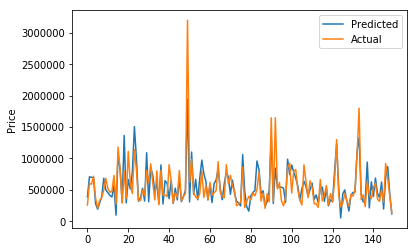

In [47]:
plt.plot(y_predict[:150,], label = 'Predicted')
plt.plot(y_test[:150,].values, label = 'Actual')
plt.ylabel('Price')
plt.legend()
plt.show()


In [48]:
r_square = linear_model.score(X_test, y_test)
r_square

0.6718705655144296

# Standardizing 

In [49]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [50]:
scaler_x = scaler.fit_transform(x_continouse) 

In [51]:
scaled_df = pd.DataFrame(data= scaler_x, columns= columns)
scaled_df.head()

,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,bedrooms,condition,grade
0,0.500221,-0.370092,-0.310988,0.936506,-0.565640,0.290333,1.259497,-0.210128,-0.359733,-0.402126,-0.398737,-0.629187,0.291916
1,1.798677,2.482634,-0.214077,0.936506,1.414864,2.504697,1.259497,-0.210128,-0.097104,-0.324443,-0.398737,-0.629187,1.993418
2,-1.447464,-1.012500,0.364008,-0.915427,-0.770936,-0.658681,-0.715124,-0.210128,-0.461867,0.253284,-1.473959,-0.629187,-1.409587
3,0.824835,-0.032556,-0.268158,0.936506,0.315926,-0.658681,1.463768,-0.210128,0.092573,-0.321147,0.676485,-0.629187,0.291916
4,2.123291,1.568020,-0.269510,0.010539,0.497070,2.323933,-1.974795,-0.210128,0.471927,-0.294594,0.676485,2.444294,0.291916


In [52]:
scaled_df = pd.concat([scaled_df, x_categorial, x_zipcode],axis=1)
scaled_df.head()

,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,...,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
0,0.500221,-0.370092,-0.310988,0.936506,-0.565640,0.290333,1.259497,-0.210128,-0.359733,-0.402126,...,0,0,0,0,0,0,0,0,0,0
1,1.798677,2.482634,-0.214077,0.936506,1.414864,2.504697,1.259497,-0.210128,-0.097104,-0.324443,...,0,0,0,0,0,0,0,0,0,0
2,-1.447464,-1.012500,0.364008,-0.915427,-0.770936,-0.658681,-0.715124,-0.210128,-0.461867,0.253284,...,0,0,0,0,0,0,0,0,0,0
3,0.824835,-0.032556,-0.268158,0.936506,0.315926,-0.658681,1.463768,-0.210128,0.092573,-0.321147,...,0,0,0,0,0,0,0,0,0,0
4,2.123291,1.568020,-0.269510,0.010539,0.497070,2.323933,-1.974795,-0.210128,0.471927,-0.294594,...,0,0,0,0,0,0,0,0,0,0


In [54]:
from sklearn.model_selection import train_test_split
X= scaled_df
Y= house_data['price']


In [55]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2, random_state =0)

In [56]:
from sklearn.linear_model import LinearRegression
liner_model = LinearRegression(fit_intercept=False)
linear_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [57]:
linear_model.score(X_train, y_train)

0.8073924776542368

In [58]:
y_predict = linear_model.predict(X_test)
r_square = linear_model.score(X_test, y_test)

In [59]:
r_square

0.8080104233600802

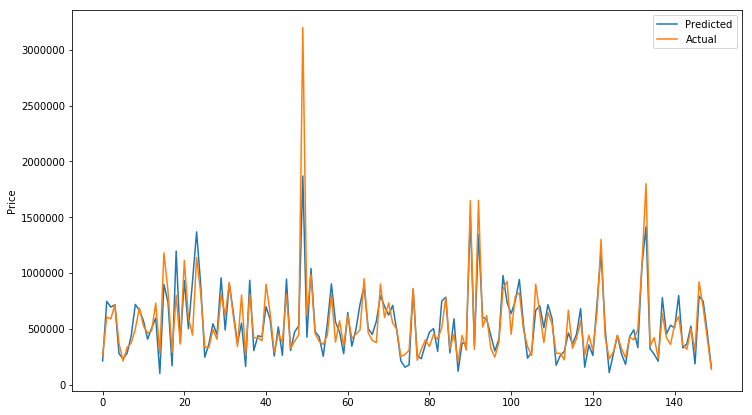

In [60]:
plt.figure(figsize=(12,7))
plt.plot(y_predict[:150,], label = 'Predicted')
plt.plot(y_test[:150,].values, label = 'Actual')
plt.ylabel('Price')
plt.legend()
plt.show()


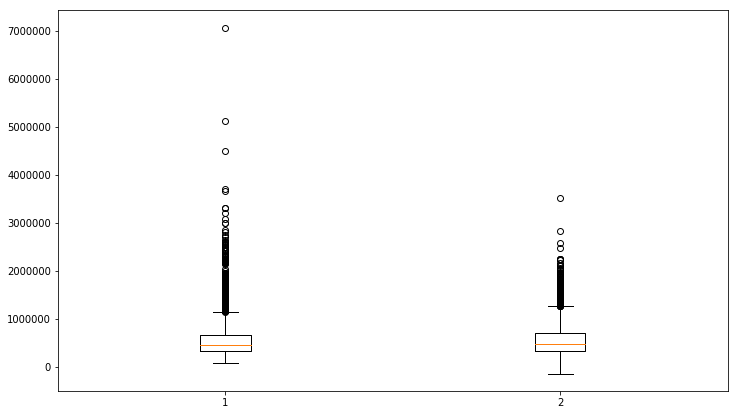

In [61]:
plt.figure(figsize=(12,7))
plt.boxplot([y_test, y_predict])
plt.show()

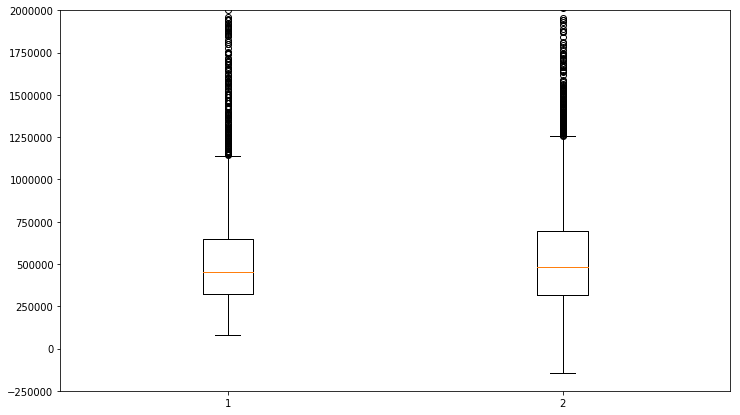

In [62]:
plt.figure(figsize=(12,7))
plt.ylim(bottom = -250000, top = 2000000)
plt.boxplot([y_test, y_predict])
plt.show()